In [3]:
!pip install d2l==0.17.2

In [4]:
#import library
%matplotlib inline
import tensorflow as tf
from d2l import tensorflow as d2l

d2l.use_svg_display()

##3.5.1. Reading the Dataset
We can download and read the Fashion-MNIST dataset into memory via the build-in functions in the framework.

In [5]:
mnist_train, mnist_test = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Fashion-MNIST consists of images from 10 categories, each represented by 6000 images in the training dataset and by 1000 in the test dataset. Consequently the training set and the test set contain 60000 and 10000 images, respectively.

In [6]:
len(mnist_train[0]), len(mnist_test[0])

(60000, 10000)

The height and width of each input image are both 28 pixels. Note that the dataset consists of grayscale images, whose number of channels is 1.

For brevity,
we store the shape of any image with height $h$ width $w$ pixels as $h \times w$ or ($h$, $w$).


In [7]:
mnist_train[0][0].shape

(28, 28)

The images in Fashion-MNIST are associated with the following categories: t-shirt, trousers, pullover, dress, coat, sandal, shirt, sneaker, bag, and ankle boot. The following function converts between numeric label indices and their names in text.

In [8]:
def get_fashion_mnist_labels(labels): 
    """Return text labels for the Fashion-MNIST dataset."""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

Create a function to visualize these examples

In [10]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5): 
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        ax.imshow(img.numpy())
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

Here are the images and their corresponding labels (in text) for the first few examples in the training dataset.

In [12]:
pip install matplotlib==3.0.2

     |████████████████████████████████| 12.9 MB 13.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.3
    Uninstalling matplotlib-3.3.3:
      Successfully uninstalled matplotlib-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.2 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.2 which is incompatible.
d2l 0.17.2 requires matplotlib==3.3.3, but you have matplotlib 3.0.2 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


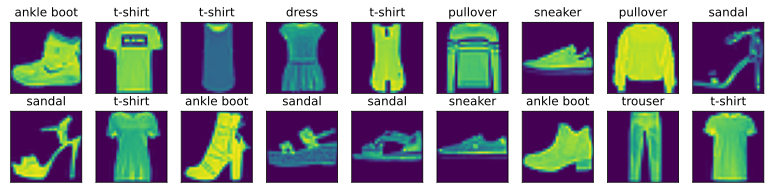

In [13]:
X = tf.constant(mnist_train[0][:18])
y = tf.constant(mnist_train[1][:18])
show_images(X, 2, 9, titles=get_fashion_mnist_labels(y));

The output of cell [13]

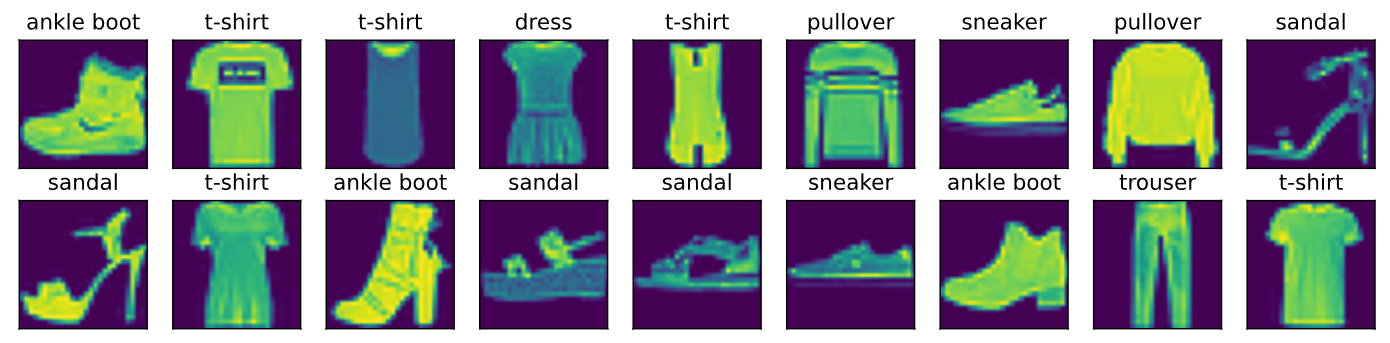

##3.5.2. Reading a Minibatch

To make our life easier when reading from the training and test sets, we use the built-in data iterator rather than creating one from scratch. Recall that at each iteration, a data iterator reads a minibatch of data with size batch_size each time. We also randomly shuffle the examples for the training data iterator.

In [14]:
batch_size = 256
train_iter = tf.data.Dataset.from_tensor_slices(
    mnist_train).batch(batch_size).shuffle(len(mnist_train[0]))

Look at the time it takes to read the training data!

In [15]:
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'0.18 sec'

##3.5.3. Putting All Things Together

Now we define the load_data_fashion_mnist function that obtains and reads the Fashion-MNIST dataset. It returns the data iterators for both the training set and validation set. In addition, it accepts an optional argument to resize images to another shape.

In [16]:
def load_data_fashion_mnist(batch_size, resize=None): 
    """Download the Fashion-MNIST dataset and then load it into memory."""
    mnist_train, mnist_test = tf.keras.datasets.fashion_mnist.load_data()
    # Divide all numbers by 255 so that all pixel values are between
    # 0 and 1, add a batch dimension at the last. And cast label to int32
    process = lambda X, y: (tf.expand_dims(X, axis=3) / 255,
                            tf.cast(y, dtype='int32'))
    resize_fn = lambda X, y: (
        tf.image.resize_with_pad(X, resize, resize) if resize else X, y)
    return (
        tf.data.Dataset.from_tensor_slices(process(*mnist_train)).batch(
            batch_size).shuffle(len(mnist_train[0])).map(resize_fn),
        tf.data.Dataset.from_tensor_slices(process(*mnist_test)).batch(
            batch_size).map(resize_fn))

Test the image resizing feature of the load_data_fashion_mnist function by specifying the resize argument.

In [17]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

(32, 64, 64, 1) <dtype: 'float32'> (32,) <dtype: 'int32'>
